In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time 
import datetime 

%matplotlib inline

In [2]:
consumption_deviation = pd.read_csv('consumption_deviation_FR_new.csv', delimiter=";", decimal=",", parse_dates=['timestamp'], dayfirst=True)
consumption_deviation.columns = ['timestamp', 'consumption_deviation']
consumption_deviation['consumption_deviation'] = consumption_deviation['consumption_deviation'].str.replace(",",".")
consumption_deviation.head()

,timestamp,consumption_deviation
0,2017-01-01 00:00:00,-44.875
1,2017-01-01 00:30:00,-18.125
2,2017-01-01 01:00:00,-10.375
3,2017-01-01 01:30:00,7.125
4,2017-01-01 02:00:00,-43.375


In [3]:
consumption_deviation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17540 entries, 0 to 17539
Data columns (total 2 columns):
timestamp                17540 non-null datetime64[ns]
consumption_deviation    17540 non-null object
dtypes: datetime64[ns](1), object(1)
memory usage: 274.2+ KB


In [4]:
nonnumeric_rows_list = pd.to_numeric(consumption_deviation['consumption_deviation'], errors='coerce').isnull()
nonnumeric_rows = consumption_deviation[nonnumeric_rows_list]
nonnumeric_rows.head()
consumption_deviation[consumption_deviation['consumption_deviation']=='na']

,timestamp,consumption_deviation
13594,2017-10-11 16:00:00,na
13595,2017-10-11 16:30:00,na
13596,2017-10-11 17:00:00,na


In [5]:
consumption_deviation[13592:13595]

,timestamp,consumption_deviation
13592,2017-10-11 15:00:00,38.625
13593,2017-10-11 15:30:00,-77
13594,2017-10-11 16:00:00,na


In [6]:
deviation_values_1600 = consumption_deviation[(consumption_deviation['timestamp'] >= '2017-10-04 16:00:00') & 
                                              (consumption_deviation['timestamp'] <= '2017-10-18 16:00:00') & (consumption_deviation['timestamp'] != '2017-10-11 16:00:00') ]
deviation_values_1600 = deviation_values_1600.set_index('timestamp').at_time('16:00').reset_index()
deviation_values_1600['consumption_deviation'] = pd.to_numeric(deviation_values_1600['consumption_deviation'])
consumption_deviation.at[13594,'consumption_deviation'] = deviation_values_1600.consumption_deviation.mean()

In [7]:
deviation_values_1630 = consumption_deviation[(consumption_deviation['timestamp'] >= '2017-10-04 16:30:00') & 
                                              (consumption_deviation['timestamp'] <= '2017-10-18 16:30:00') & (consumption_deviation['timestamp'] != '2017-10-11 16:30:00') ]
deviation_values_1630 = deviation_values_1630.set_index('timestamp').at_time('16:30').reset_index()
deviation_values_1630['consumption_deviation'] = pd.to_numeric(deviation_values_1630['consumption_deviation'])
consumption_deviation.at[13595,'consumption_deviation'] = deviation_values_1630.consumption_deviation.mean()

In [8]:
deviation_values_1700 = consumption_deviation[(consumption_deviation['timestamp'] >= '2017-10-04 17:00:00') & 
                                              (consumption_deviation['timestamp'] <= '2017-10-18 17:00:00') & (consumption_deviation['timestamp'] != '2017-10-11 17:00:00') ]
deviation_values_1700 = deviation_values_1700.set_index('timestamp').at_time('17:00').reset_index()
deviation_values_1700['consumption_deviation'] = pd.to_numeric(deviation_values_1700['consumption_deviation'])
consumption_deviation.at[13596,'consumption_deviation'] = deviation_values_1700.consumption_deviation.mean()

In [9]:
consumption_deviation['consumption_deviation'] = pd.to_numeric(consumption_deviation['consumption_deviation'])
consumption_deviation.tail()

,timestamp,consumption_deviation
17535,2017-12-31 22:45:00,-21.489829
17536,2017-12-31 23:00:00,-7.807809
17537,2017-12-31 23:15:00,-56.697261
17538,2017-12-31 23:30:00,21.832569
17539,2017-12-31 23:45:00,4.452219


In [10]:
consumption_deviation['consumption_deviation'].mean()

-7851.166473977351

In [11]:
consumption_deviation['consumption_deviation'].median()

2.875

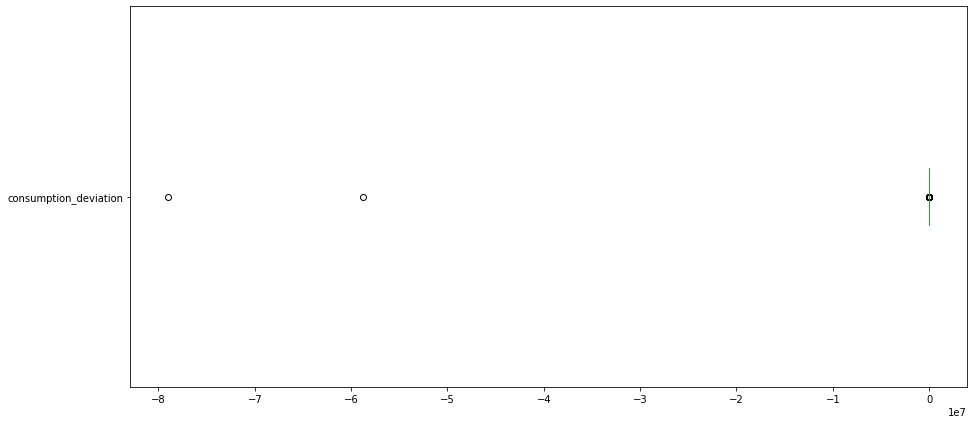

In [12]:
consumption_deviation['consumption_deviation'].plot(kind='box', vert=False, figsize=(15,7))

In [13]:
outliers = consumption_deviation[consumption_deviation['consumption_deviation']<-10000]
outliers

,timestamp,consumption_deviation
6244,2017-05-11 04:00:00,-58796353.0
6245,2017-05-11 04:30:00,-78985465.0


In [14]:
pos = [6244,6245]
consumption_deviation.drop(consumption_deviation.index[pos], inplace=True)

In [15]:
consumption_deviation['consumption_deviation'].mean()

4.125786659668825

In [16]:
consumption_deviation['consumption_deviation'].median()

2.875

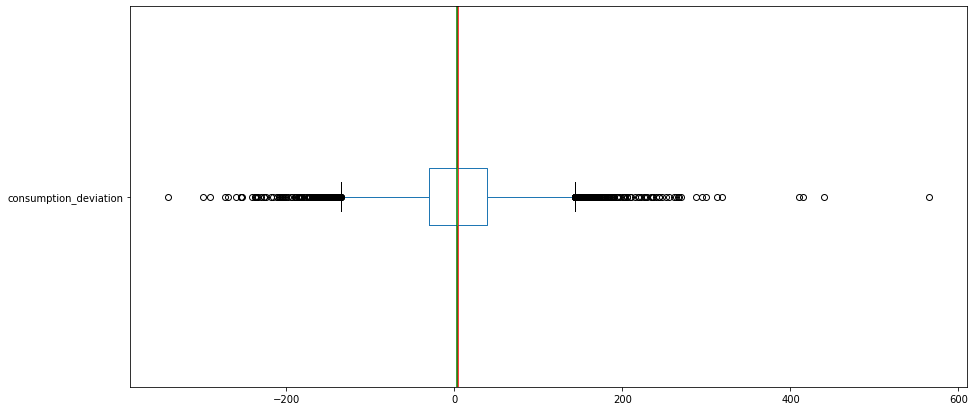

In [17]:
plot2 = consumption_deviation['consumption_deviation'].plot(kind='box', vert=False, figsize=(15,7))
plot2.axvline(consumption_deviation['consumption_deviation'].mean(), color='red')
plot2.axvline(consumption_deviation['consumption_deviation'].median(), color='green')

In [18]:
outliers = consumption_deviation[consumption_deviation['consumption_deviation']>400]
outliers

,timestamp,consumption_deviation
16300,2017-12-07 04:00:00,415.250
16301,2017-12-07 04:30:00,565.125
16302,2017-12-07 05:00:00,410.000
16303,2017-12-07 05:30:00,440.125


In [19]:
consumption_deviation[(consumption_deviation['timestamp'] >= '2017-12-07 00:00:00') & 
                                              (consumption_deviation['timestamp'] <= '2017-12-07 23:30:00')]

,timestamp,consumption_deviation
16292,2017-12-07 00:00:00,121.875
16293,2017-12-07 00:30:00,173.875
16294,2017-12-07 01:00:00,228.500
16295,2017-12-07 01:30:00,222.250
16296,2017-12-07 02:00:00,244.000
16297,2017-12-07 02:30:00,147.625
16298,2017-12-07 03:00:00,113.625
16299,2017-12-07 03:30:00,123.000
16300,2017-12-07 04:00:00,415.250
16301,2017-12-07 04:30:00,565.125


In [20]:
outliers = consumption_deviation[consumption_deviation['consumption_deviation']<-300]
outliers

,timestamp,consumption_deviation
1178,2017-01-25 13:00:00,-340.75


In [21]:
consumption_deviation[(consumption_deviation['timestamp'] >= '2017-01-25 00:00:00') & 
                                              (consumption_deviation['timestamp'] <= '2017-01-25 23:30:00')]

,timestamp,consumption_deviation
1152,2017-01-25 00:00:00,-5.250
1153,2017-01-25 00:30:00,-25.750
1154,2017-01-25 01:00:00,-64.250
1155,2017-01-25 01:30:00,8.750
1156,2017-01-25 02:00:00,-17.625
1157,2017-01-25 02:30:00,-9.125
1158,2017-01-25 03:00:00,-46.750
1159,2017-01-25 03:30:00,-36.875
1160,2017-01-25 04:00:00,-6.875
1161,2017-01-25 04:30:00,-38.375


In [22]:
daily_consumption_deviation = consumption_deviation.resample('d', on='timestamp').mean()
daily_consumption_deviation.reset_index(inplace=True)

In [23]:
#daily_consumption_deviation.loc[daily_consumption_deviation['consumption_deviation'] >=0,'consumption_label'] = 's'
#daily_consumption_deviation.loc[daily_consumption_deviation['consumption_deviation'] <0,'consumption_label'] = 'd'
daily_consumption_deviation = daily_consumption_deviation.round({'consumption_deviation': 3})
daily_consumption_deviation

,timestamp,consumption_deviation
0,2017-01-01,-25.521
1,2017-01-02,39.706
2,2017-01-03,-29.565
3,2017-01-04,-61.049
4,2017-01-05,2.193
...,...,...
360,2017-12-27,-80.122
361,2017-12-28,-33.854
362,2017-12-29,5.758
363,2017-12-30,-35.747


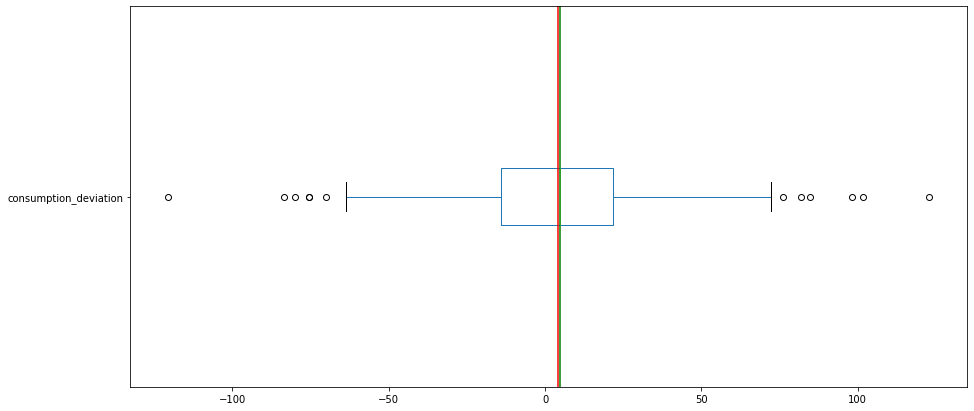

In [24]:
plot3 = daily_consumption_deviation['consumption_deviation'].plot(kind='box', vert=False, figsize=(15,7))
plot3.axvline(daily_consumption_deviation['consumption_deviation'].mean(), color='red')
plot3.axvline(daily_consumption_deviation['consumption_deviation'].median(), color='green')

In [25]:
outliers = daily_consumption_deviation[daily_consumption_deviation['consumption_deviation']<-70]
outliers

,timestamp,consumption_deviation
65,2017-03-07,-120.536
169,2017-06-19,-75.674
255,2017-09-13,-70.070
355,2017-12-22,-83.641
356,2017-12-23,-75.513
360,2017-12-27,-80.122


In [26]:
#daily_consumption_deviation[(daily_consumption_deviation['timestamp'] == '2017-03-07')].consumption_deviation.mean()

In [27]:
outliers = daily_consumption_deviation[daily_consumption_deviation['consumption_deviation']>80]
outliers

,timestamp,consumption_deviation
31,2017-02-01,98.133
86,2017-03-28,81.745
89,2017-03-31,84.585
254,2017-09-12,101.599
340,2017-12-07,122.820


In [28]:
daily_consumption_deviation['month-day'] = daily_consumption_deviation['timestamp'].apply( lambda x: x.strftime('%m-%d'))
daily_consumption_deviation.head()

,timestamp,consumption_deviation,month-day
0,2017-01-01,-25.521,01-01
1,2017-01-02,39.706,01-02
2,2017-01-03,-29.565,01-03
3,2017-01-04,-61.049,01-04
4,2017-01-05,2.193,01-05


In [29]:
%store daily_consumption_deviation

Stored 'daily_consumption_deviation' (DataFrame)
